In [27]:
import sys
sys.path.insert(0, '/home/disk/p/jkcm/Code')
import matplotlib as mpl
import pickle
import seaborn as sns
import numpy as np
# import glob
import xarray as xr
import matplotlib.pyplot as plt
# import datetime as dt
# from Lagrangian_CSET import met_utils as mu
# import multiprocessing as mp
# from tools.LoopTimer import LoopTimer
# from Lagrangian_CSET import utils
# from multiprocessing import Pool, cpu_count

import utils
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
all_class_df = utils.load_class_data('all')
# sep_class_df = all_class_df[all_class_df['loc']=='SEP']
cset_class_df = all_class_df[all_class_df['loc']=='CSET']

In [33]:
all_sep_df = pd.DataFrame()
for year in ['2014', '2015', '2016']:
    savefile = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/sep_with_clim_MERRA_{year}.pickle'
    temp_df = pickle.load(open(savefile, 'rb'))
    all_sep_df = pd.concat([all_sep_df, temp_df], ignore_index=True)

In [34]:
all_sep_df.columns

Index(['cat', 'cert', 'date', 'high_cf', 'i', 'j', 'lat', 'loc', 'lon',
       'low_cf', 'name', 'sensor_zenith', 'year', 'datetime', 'granule', 'day',
       'locyear', 'season', 'ascat_div', 'ascat_div_std', 'ascat_time_offset',
       'ascat_div_clim', 'MERRA_div_sfc', 'MERRA_SST', 'MERRA_EIS',
       'MERRA_LTS', 'MERRA_subs_850_s', 'MERRA_z_850_s', 'MERRA_div_850_ss',
       'MERRA_subs_700', 'MERRA_z_700', 'MERRA_div_ls', 'MERRA_subs_700_s',
       'MERRA_z_700_s', 'MERRA_div_ss', 'MERRA_ascat_sfc_anomaly',
       'MERRA_MERRA_sfc_anomaly'],
      dtype='object')

Text(0.5, 1.1, 'ASCAT divergence by cloud type for SEP region, all years')

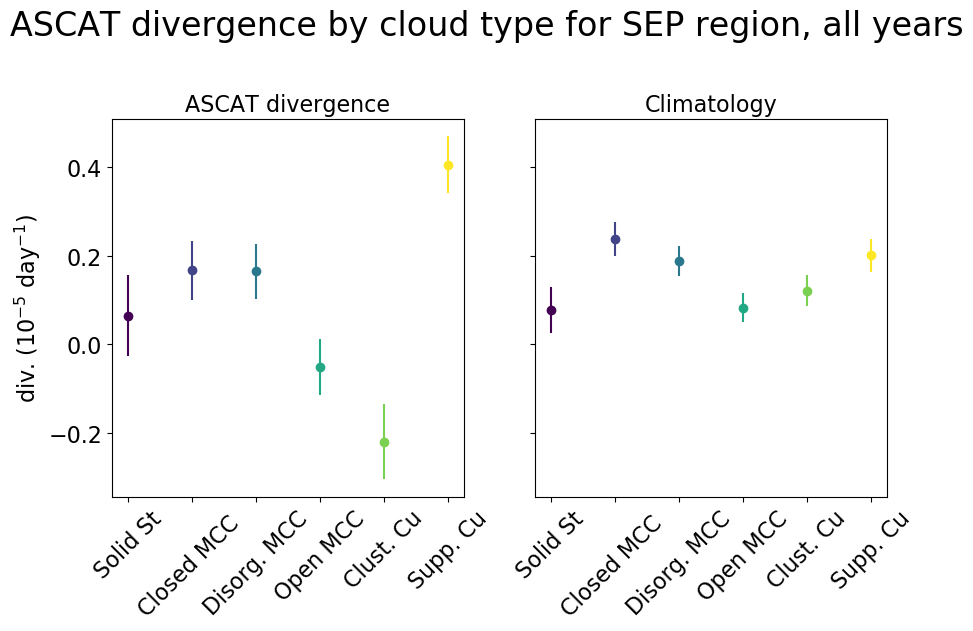

In [19]:
fig, [ax0, ax1] = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
utils.plot_mean_by_cat(all_sep_df, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT divergence')
utils.plot_mean_by_cat(all_sep_df, 'ascat_div_clim', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=1e5)
ax1.set_title('Climatology')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
plt.suptitle('ASCAT divergence by cloud type for SEP region, all years', y=1.1)

In [19]:
savefile = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_with_clim.pickle'
all_df = pickle.load(open(savefile, 'rb'))
cset_df = all_df.loc[all_df['loc']=='NEP']
sep_df = all_df.loc[all_df['loc']=='SEP']

Text(0.5, 1.1, 'ASCAT divergence by cloud type for CSET region')

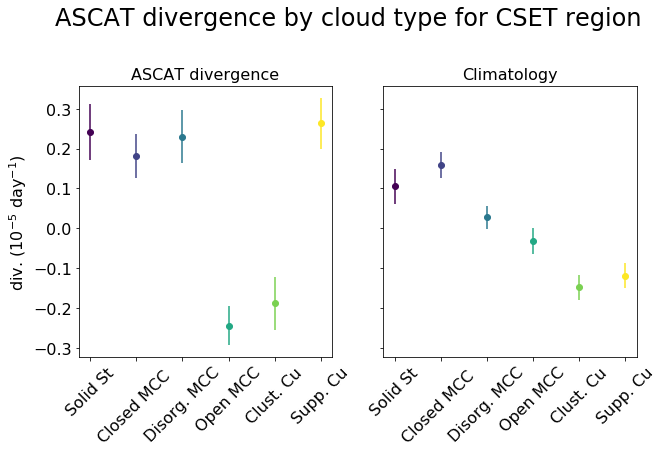

In [20]:
fig, [ax0, ax1] = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
utils.plot_mean_by_cat(cset_df, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT divergence')
utils.plot_mean_by_cat(cset_df, 'ascat_div_clim', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=1e5)
ax1.set_title('Climatology')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
plt.suptitle('ASCAT divergence by cloud type for CSET region', y=1.1)

Text(0.5, 1.1, 'ASCAT divergence by cloud type for SEP region')

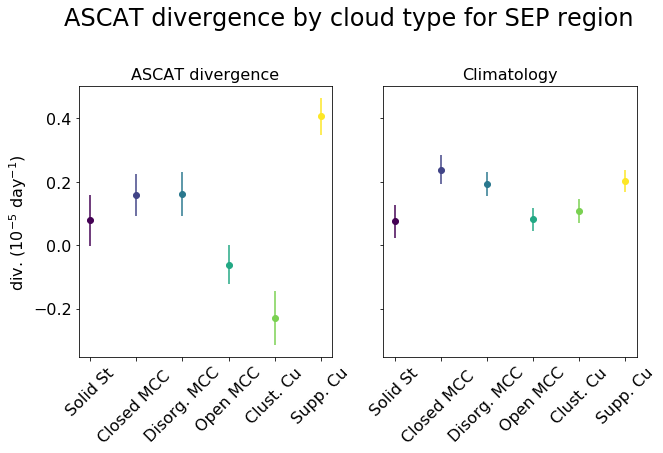

In [21]:
fig, [ax0, ax1] = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
utils.plot_mean_by_cat(sep_df, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT divergence')
utils.plot_mean_by_cat(sep_df, 'ascat_div_clim', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=1e5)
ax1.set_title('Climatology')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
plt.suptitle('ASCAT divergence by cloud type for SEP region', y=1.1)

In [32]:
cset_shifts = dict()
sep_shifts = dict()
for shift in ['-2', '-1', '0', '1', '2']:
    savefile = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_with_div_shift_{shift}.pickle'
    all_df = pickle.load(open(savefile, 'rb'))
    cset_df = all_df.loc[all_df['loc']=='NEP']
    sep_df = all_df.loc[all_df['loc']=='SEP']
    cset_shifts[shift] = cset_df
    sep_shifts[shift] = sep_df

Solid St:, total:6166, usable:58%
       mean:0.18725762734362314, stderr:0.06290372419694244
Closed MCC :, total:3291, usable:54%
       mean:0.20077968948112215, stderr:0.05454611452800286
Disorg. MCC:, total:4340, usable:57%
       mean:0.10086124443697284, stderr:0.06114435787872798
Open MCC:, total:839, usable:51%
       mean:-0.08996792357118392, stderr:0.05718387869899444
Clust. Cu:, total:10805, usable:52%
       mean:-0.019328676534409065, stderr:0.07417695739350824
Supp. Cu:, total:9936, usable:50%
       mean:0.07242440957758357, stderr:0.062152199117147644
Solid St:, total:6166, usable:60%
       mean:0.21883225615504742, stderr:0.06836518561255013
Closed MCC :, total:3291, usable:57%
       mean:0.2654557780309101, stderr:0.051248459325677405
Disorg. MCC:, total:4340, usable:57%
       mean:0.20974161839120195, stderr:0.06500679251216779
Open MCC:, total:839, usable:53%
       mean:-0.19124115505139572, stderr:0.05886518142465287
Clust. Cu:, total:10805, usable:50%
       

Text(0.5, 1.1, 'ASCAT divergence by cloud type for CSET region')

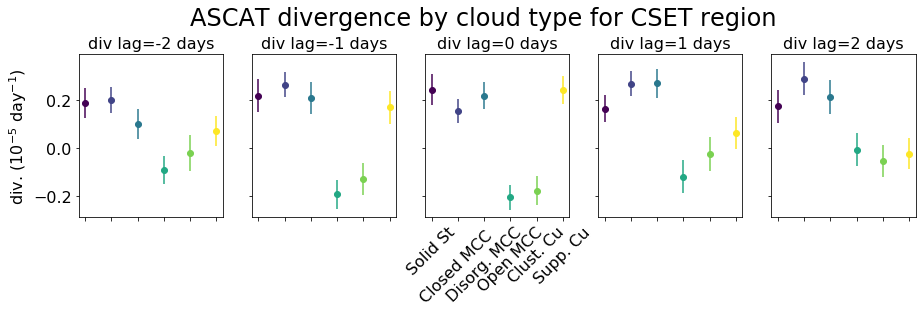

In [50]:
fig, ax = plt.subplots(figsize=(15, 3), ncols=5, sharey=True)
for axi, shift in zip(ax, ['-2', '-1', '0', '1', '2']):
    datavar = 'ascat_div' if shift=='0' else f'ascat_div_{shift}'
    utils.plot_mean_by_cat(cset_shifts[shift], datavar, verbose=True, bootstrap=True, ax=axi,
                       scale_factor=1e5)
    axi.set_title(f'div lag={shift} days')
ax[0].set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
for i in [0,1,3,4]:
    ax[i].set_xticklabels(['']*6)
plt.suptitle('ASCAT divergence by cloud type for CSET region', y=1.1)

Text(0.5, 1.1, 'ASCAT divergence by cloud type for SEP region')

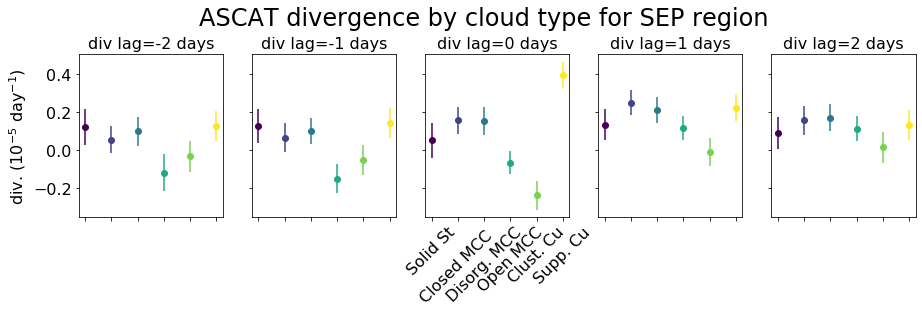

In [49]:
fig, ax = plt.subplots(figsize=(15, 3), ncols=5, sharey=True)
for axi, shift in zip(ax, ['-2', '-1', '0', '1', '2']):
    datavar = 'ascat_div' if shift=='0' else f'ascat_div_{shift}'
    utils.plot_mean_by_cat(sep_shifts[shift], datavar, verbose=False, bootstrap=True, ax=axi,
                       scale_factor=1e5)
    axi.set_title(f'div lag={shift} days')
ax[0].set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
for i in [0,1,3,4]:
    ax[i].set_xticklabels(['']*6)
plt.suptitle('ASCAT divergence by cloud type for SEP region', y=1.1)

In [36]:
savefile = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_with_clim_MERRA.pickle'
cset_mdf = pickle.load(open(savefile, 'rb'))

Text(0, 0.5, 'div. (10$^{-5}$ day$^{-1}$)')

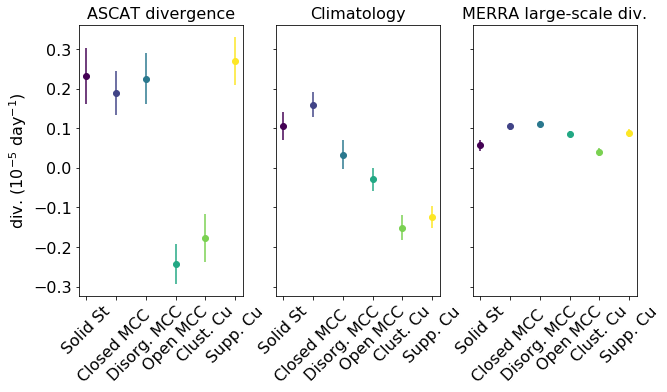

In [43]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=True)
utils.plot_mean_by_cat(cset_mdf, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT divergence')
utils.plot_mean_by_cat(cset_mdf, 'ascat_div_clim', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=1e5)
ax1.set_title('Climatology')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_div_ls', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=-1e5)
ax2.set_title('MERRA large-scale div.')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')


Text(0.5, 0.98, 'SEP')

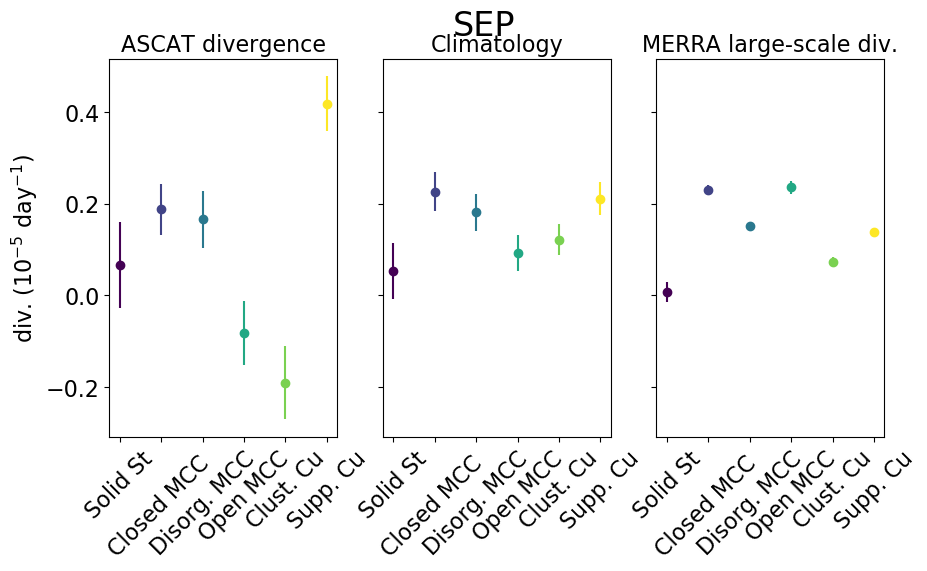

In [10]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=True)
utils.plot_mean_by_cat(all_df, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT divergence')
utils.plot_mean_by_cat(all_df, 'ascat_div_clim', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=1e5)
ax1.set_title('Climatology')
utils.plot_mean_by_cat(all_df, 'MERRA_div_ls', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=-1e5)
ax2.set_title('MERRA large-scale div.')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
plt.suptitle('SEP')

Text(0.5, 1.0, 'MERRA 700 subs')

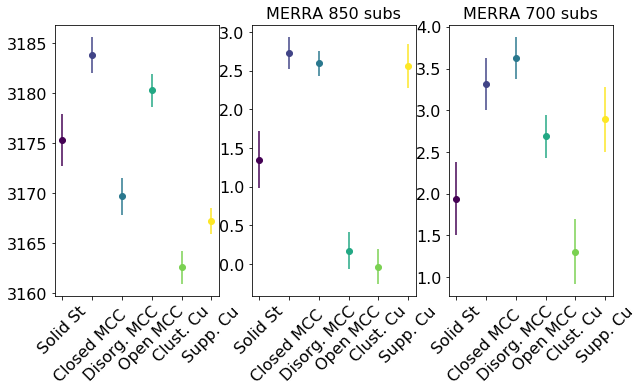

In [49]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=False)
utils.plot_mean_by_cat(cset_mdf, 'MERRA_z_700_s', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1)
# ax0.set_title('ASCAT div')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_subs_850_s', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=-1e3)
ax1.set_title('MERRA 850 subs')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_subs_700_s', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=-1e3)
ax2.set_title('MERRA 700 subs')
# ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')


Text(0, 0.5, 'div. (10$^{-5}$ day$^{-1}$)')

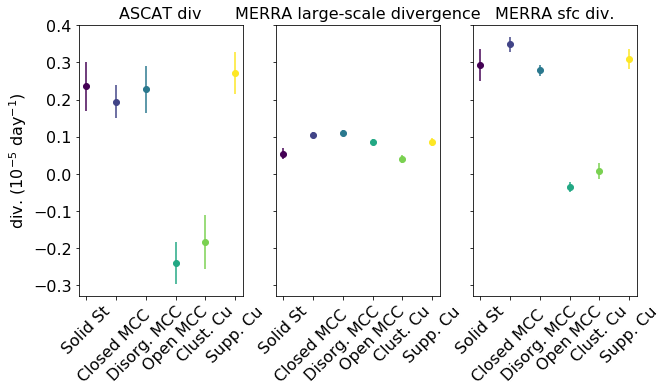

In [42]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=True)
utils.plot_mean_by_cat(cset_mdf, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT div')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_div_ls', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=-1e5)
ax1.set_title('MERRA large-scale divergence')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_div_sfc', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=1e5)
ax2.set_title('MERRA sfc div.')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')


Text(0.5, 0.98, 'SEP, all years')

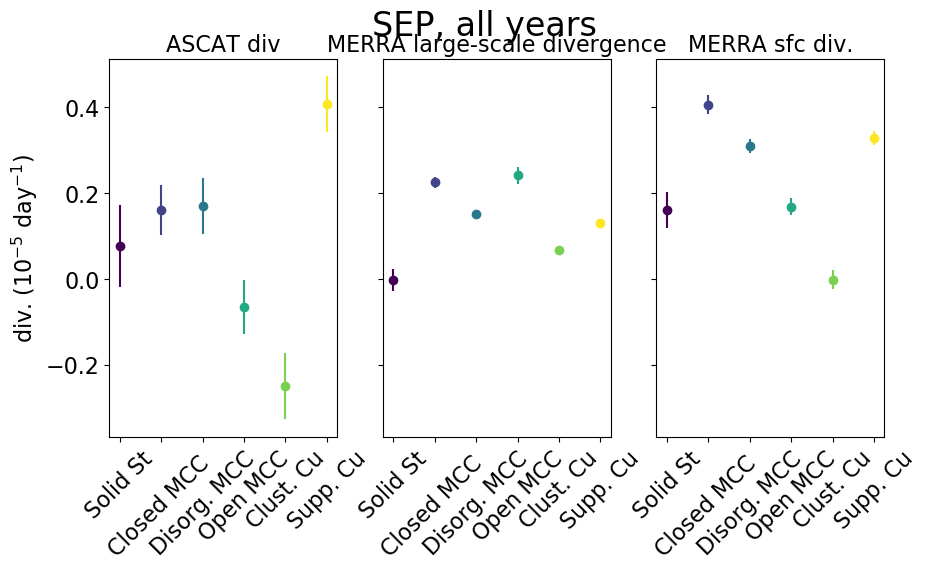

In [20]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=True)
utils.plot_mean_by_cat(all_sep_df, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT div')
utils.plot_mean_by_cat(all_sep_df, 'MERRA_div_ls', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=-1e5)
ax1.set_title('MERRA large-scale divergence')
utils.plot_mean_by_cat(all_sep_df, 'MERRA_div_sfc', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=1e5)
ax2.set_title('MERRA sfc div.')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')
plt.suptitle("SEP, all years")

Text(0, 0.5, 'div. (10$^{-5}$ day$^{-1}$)')

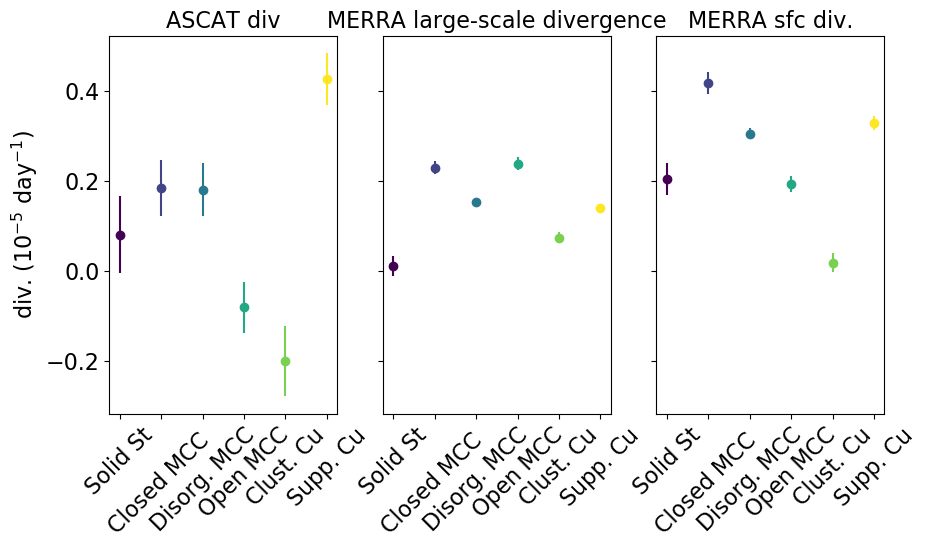

In [11]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=True)
utils.plot_mean_by_cat(all_df, 'ascat_div', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1e5)
ax0.set_title('ASCAT div')
utils.plot_mean_by_cat(all_df, 'MERRA_div_ls', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=-1e5)
ax1.set_title('MERRA large-scale divergence')
utils.plot_mean_by_cat(all_df, 'MERRA_div_sfc', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=1e5)
ax2.set_title('MERRA sfc div.')
ax0.set_ylabel('div. (10$^{-5}$ day$^{-1}$)')


Text(0, 0.5, 'K')

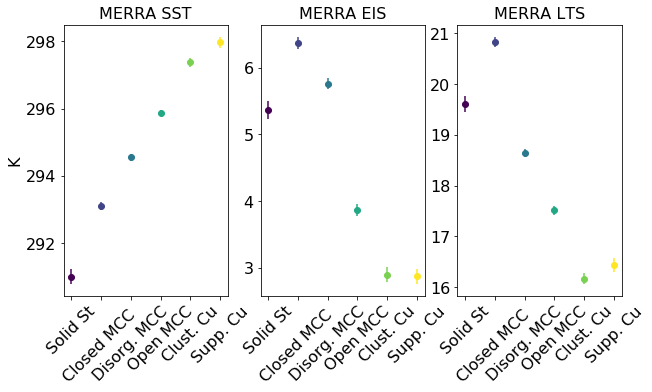

In [30]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=(10,5), ncols=3, sharey=False)
utils.plot_mean_by_cat(cset_mdf, 'MERRA_SST', verbose=False, bootstrap=True, ax=ax0,
                       scale_factor=1)
ax0.set_title('MERRA SST')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_EIS', verbose=False, bootstrap=True, ax=ax1,
                       scale_factor=1)
ax1.set_title('MERRA EIS')
utils.plot_mean_by_cat(cset_mdf, 'MERRA_LTS', verbose=False, bootstrap=True, ax=ax2,
                       scale_factor=1)
ax2.set_title('MERRA LTS')
ax0.set_ylabel('K')


<xarray.Dataset>
Dimensions:    (latitude: 240, longitude: 320, time: 246)
Coordinates:
  * longitude  (longitude) float64 180.1 180.4 180.6 180.9 ... 259.4 259.6 259.9
  * latitude   (latitude) float64 -9.875 -9.625 -9.375 ... 49.38 49.62 49.88
  * time       (time) datetime64[ns] 2015-04-18T13:51:12.172656248 ... 2015-06-21T11:22:12.441406252
Data variables:
    CWV        (time, latitude, longitude) float64 ...
    day        (time, latitude, longitude) datetime64[ns] ...
Attributes:
    Comment:  Compiling AMSR2 column water vapor data for the CSET region dur...
    history:  Fri Jan 17 09:21:49 2020: ncatted -a _FillValue,,d,, AMSR2_CWV_...
    NCO:      netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, C...

In [41]:
import datetime as dt

In [45]:
date_adj = dt.datetime(2014, 3, 14)

In [49]:
max(amsr_data.time)

<xarray.DataArray 'time' ()>
array('2015-06-26T06:18:23.031250002', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-06-26T06:18:23.031250002

In [46]:
amsr_file = r'/home/disk/eos4/jkcm/Data/CSET/amsr/AMSR2_CWV_CSET_fixed.nc'
amsr_data = xr.open_dataset(amsr_file)        
amsr_cwv = amsr_data.CWV.sel(time=date_adj.date(), method='nearest')
# df['amsr_all'] = df.apply(lambda x: add_amsr_cwv(amsr_cwv, x['lat'], x['lon'], x['datetime']), axis=1)   
# df['amsr_cwv'] = df.apply(lambda x: x['amsr_all'][0], axis=1)
# df['amsr_cwv_region'] = df.apply(lambda x: x['amsr_all'][1], axis=1)
# df['asmr_local_anom'] = df['amsr_cwv'] - df['amsr_cwv_region']
# df = df.drop(columns='amsr_all')

KeyError: datetime.date(2014, 3, 14)